In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
from scipy import stats

data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)

#Clean up certain names, some of the data wasn't titled the way I liked, this changed that.
df['region'] = df['region'].str.replace("BaltimoreWashington", "Baltimore")
df['region'] = df['region'].str.replace("BuffaloRochester", "Buffalo")
df['region'] = df['region'].str.replace("CincinnatiDayton", "Cincinnati")
df['region'] = df['region'].str.replace("DallasFtWorth", "Dallas")
df['region'] = df['region'].str.replace("HarrisburgScranton", "Harrisburg")
df['region'] = df['region'].str.replace("HartfordSpringfield", "Hartford")
df['region'] = df['region'].str.replace("MiamiFtLauderdale", "Miami")
df['region'] = df['region'].str.replace("NewOrleansMobile", "NewOrleans")
df['region'] = df['region'].str.replace("PhoenixTucson", "Phoenix")
df['region'] = df['region'].str.replace("RaleighGreensboro", "Raleigh")
df['region'] = df['region'].str.replace("RichmondNorfolk", "Richmond")
df['region'] = df['region'].str.replace("WestTexNewMexico", "NewMexico")
#Remove state/regional/total data
df=df[np.logical_not(df['region'].isin(["West", 'California', 'TotalUS', 'Plains', 'Southeast', 'SouthCentral', 'Northeast', 'Midsouth', 'GreatLakes']))]
#To sort our data so it graphs neatly...
df.sort_values('Total Volume', ascending=False, inplace=True)

In [26]:
#Does decreasing prices lead to more sales of avocados
#Let's remove what we wont be using..

#df = df.drop('Date', axis=1)
#df = df.drop('Unnamed: 0', axis=1)
#df = df.drop('4046', axis=1)
#df = df.drop('4225', axis=1)
#df = df.drop('type', axis=1)
#df = df.drop('4770', axis=1)
#df = df.drop('Total Bags', axis=1)
#df = df.drop('Small Bags', axis=1)
#df = df.drop('XLarge Bags', axis=1)

df.groupby('region').aggregate(np.mean)
df['AveragePrice'].describe()

count    15207.000000
mean         1.414563
std          0.412833
min          0.440000
25%          1.100000
50%          1.370000
75%          1.680000
max          3.250000
Name: AveragePrice, dtype: float64

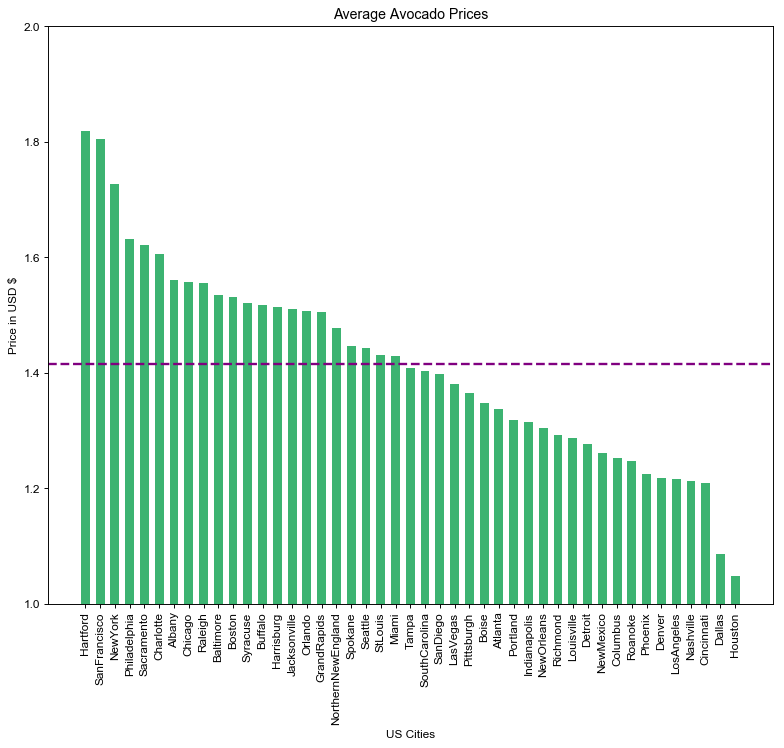

The average price of Avocados in the US is $1.41


In [27]:
ali = df.groupby('region', as_index=False)['AveragePrice'].mean()
ali.sort_values('AveragePrice', ascending=False, inplace=True)

figure(num=None, figsize=(11, 9), dpi=85, facecolor='w', edgecolor='k')

plt.bar(ali['region'], ali['AveragePrice'], width=0.6, color='mediumseagreen')
plt.xticks(rotation=90)
plt.xlabel('US Cities')
plt.ylabel('Price in USD $')
plt.title('Average Avocado Prices')
plt.axhline(ali['AveragePrice'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.ylim(1,2)
plt.style.use('seaborn')
plt.show()

price = np.sum(df.AveragePrice)/len(df.AveragePrice)
priceround = ("%.2f" % round(price,2))
print('The average price of Avocados in the US is ${}'.format(priceround))

# The Problem
### How to increase avocado sales nationwide?
#### The Hass Avocado Board would certainly love to up sales, who wouldn't. Increased sales lead to more demand for production, thus creating more job opportunities for a new workforce and better pay / benefits for pre-existing employees ultimately leading to a better and more desirable product, eventually giving a positive feedback loop! 

# The Potential Solution...

### Decreasing avocado prices nationwide will ultimately lead to an increase and sales that is proportionately higher than the loss of profit from that price reduction.

   #### A potential side outcome to observe is the effect of price manipulation in higher vs lower populated cities to eventually tailor increased / decreased pricing based on population, age, ethnic background, political leanings, etc of each city. 

# Methods
#### Using sales data obtained over the last 3 years we know the average weekly volume of Avocados being consumed in each city. We will then normalize these numbers by dividing our weekly avocado volume by the population of each city to get  our statistic "Avocado Per Person" or APP. This is the metric we will be testing to see if sales are increasing in each test city.

#### We will calculate the average APP for each city and use that info to generate a standard bell curve, this will make the information easily digestable for those we work with.
#### We will then select 30% of our cities (all within 1 standard deviation of our mean) randomly and assign the discount prices to them of -5%, -10%, and -15%. This will also be assigned randomly

#### Please note: We will not be performing this on any of our big player cities. For example, if one of the cities we randomly choose within 1 standard deviation of the mean happens to be Los Angeles or New York we will simply roll again to find a new city. We will not touch these massive buyers unless we see positive and conclusive results from months of testing in other 'smaller' cities. Essentially the revenue from the largest cities is too important to experiment on initially. 

#### Now that prices have been lowered we will observe. We have a baseline APP for each city that has come from years of data, it is now in marketing's hands to ensure that people are aware of the new pricing. Initial testing for the 30% of cities will last 4 months. If results are trending positive we will up the amount of cities to 50%, this will continue for another 6 months. Thus giving us one full year of experimental data.

#### It is also important to note that we can also observe which price change led to the largest proportion of increased sales. If the cities with a price change of 10% increased in sales the most we can start narrowing our range of price changes.

#### If analysis is still positive after one full year we will then roll out the new pricing model to 100% of cities, big players included. 

#### CEO promotes me after sales have proven to have increased.

#### We all party


# What is a 'positive' result

#### If we see an average increase of APP by 10% for the first 4 months we will then mve forward to the 50% of cities for 6 months.

#### Again if we see increases of 10% after 6 months we will move to the full 100% rollout.

#### If we DON'T however see this increase of APP for the first 4 months we will not move on, we will however wait an additional 4 months to see if there is a lag in advertising. If no positive results revert pricing back to normal and generate new research proposal. 

#### Apply t-testing / p-value check if applicable for results.

# Potential visuals
### Pre / post price change APP graphs for visual comparison. One graph, 2 y-axes, x-axis is cities. Both pre and post. (Line, plot, histogram, etc observe what is most relevant)

### Bell Curve for APP 

### APP Histogram for all cities

### Average price / volume scatter plots for early portions of presentation.

